In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
sns.set_style('white')
rev_raw = pd.read_csv('yelp_labelled.txt', delimiter='\t', header= None)
rev_raw.columns = ['review', 'score']

rev_raw.head()

,review,score
0,LWow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
keywords = ['terrible', 'bad', 'only', 'off', 'never', 'seriously', 'dissapointed', 'awful']

for key in keywords:
    rev_raw[str(key)] = rev_raw.review.str.contains(' ' + str(key) + ' ',case=False)

In [5]:
rev_raw['allcaps'] = rev_raw.review.str.isupper()

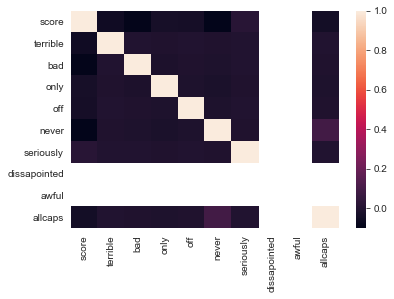

In [6]:
sns.heatmap(rev_raw.corr())

In [7]:
data = rev_raw[keywords + ['allcaps']]
target = rev_raw['score']

In [8]:
from sklearn.naive_bayes import BernoulliNB


bnb = BernoulliNB()


bnb.fit(data, target)


y_pred = bnb.predict(data)


print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 464


In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.56, 0.52, 0.56, 0.54, 0.56, 0.5 , 0.51, 0.53, 0.51, 0.55])

In [10]:
confusion_matrix(target, y_pred)

array([[ 51, 449],
       [ 15, 485]])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.535
Testing on Sample: 0.536
